# Análisis Descriptivo: Análisis de Tendencias de las ventas del negocio

El análisis de tendencia es una técnica estadística que se utiliza para identificar patrones o tendencias en un conjunto de datos a lo largo del tiempo. El análisis de tendencia es utilizado para predecir la dirección futura del comportamiento de los datos basándose en su comportamiento pasado.

### Carga de las librerías de pyhton necesarias

In [19]:
# Debe instalar las librerias necesarias antes del import
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

pd.options.display.float_format = '{:.2f}'.format

Las librerías de Python son conjuntos de código predefinidos que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

### Conexión a SQL Server y extracción de los datos

- Explique línea a línea el código mostrado abajo. Debe explicar tambien la query. Puede probar aparte la query desde Azure Data Studio o directamente desde SQL Server Managment Studio.

In [20]:
""" Mediante el módulo importado 'pyodbc' y su método 'connect', realizamos la cadena de conexión a la base de datos
 	con los siguientes argumentos:
 		- Driver: controlador para la BDD
		- Server: la máquina que aloja la BDD
		- Database: el nombre de la BDD
		- Trusted_Connection: indicamos que será una conexión de confianza con el actual usuario de Windows """
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=DESKTOP-QRE2MBQ;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
# En Server=BALRODJJ debes colocar el nombre de tu (base de datos)*-> servidor.
# Lo demás se deja igual

# Recogemos la query que aplicaremos a la BDD como String
input_query = '''select
	 year(t1.OrderDate) as 'año', 
	 month(t1.OrderDate) as 'mes',
	 sum(t1.TotalDue) as 'ventas'
from Sales.SalesOrderHeader as t1
	group by year(t1.OrderDate), month(t1.OrderDate) 
	order by year(t1.OrderDate), month(t1.OrderDate)'''

# Mediante el módulo pandas(pd) y su método 'read_sql' recogemos la devolución de la ejecución de la query en un DataFrame 
# con los argumentos:
#	- input_query: la query como string
#	- conn_str: cadena de conexión
ventas = pd.read_sql(input_query, conn_str)

C:\Users\bytetech\AppData\Local\Temp\ipykernel_4492\1025063462.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ventas = pd.read_sql(input_query, conn_str)


In [21]:
ventas

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


__Ejecución query en Microsoft SQL Server:__

![img_select_sqlserver](../img/img-I.PNG)

__Ejecución query en Azure Data Studio:__

![img_select_azure](../img/img-II.PNG)

### El código **no** da error, sin embargo imprime un `warning` donde se sugiere el uso de `SQLAlchemy` en vez de `pyodbc`. Investigue como se hace la conexión a SQL Server con SQLAlchemy utilizando la misma base de datos , pruebe con la misma query anterior, guardar los resultados en un nuevo dataframe usando read_sql e imprima la tabla. Explicar linea por linea el código utilizado.

__*(UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.)__

In [22]:
# Desde el módulo 'sqlalchemy', previamente instalado, importamos la función 'create_engine'
from sqlalchemy import create_engine

# Crear una cadena de conexión para SQLAlchemy con argumentos:
#   - Nombre del servidor 
#   - Nombre de la BDD
#   - Driver
conn_str = 'mssql+pyodbc://DESKTOP-QRE2MBQ/AdventureWorks2019?driver=ODBC+Driver+17+for+SQL+Server'

# Crear una instancia de motor de SQLAlchemy sólo con la cadena de conexión como argumnento
# (obviamos los **kwargs)
engine = create_engine(conn_str)

# Definir la consulta SQL
input_query = '''
select
    year(t1.OrderDate) as 'año', 
    month(t1.OrderDate) as 'mes',
    sum(t1.TotalDue) as 'ventas'
from Sales.SalesOrderHeader as t1
    group by year(t1.OrderDate), month(t1.OrderDate) 
    order by year(t1.OrderDate), month(t1.OrderDate)
'''

# Ejecutar la consulta y almacenar el resultado en un DataFrame de pandas
ventas = pd.read_sql_query(input_query, engine)

# Mostrar el DataFrame resultante
#print(ventas)
ventas


,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


### Exploración del dataset extraído (ventas)

- Muestre la información general del dataframe (info):

In [23]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   año     38 non-null     int64  
 1   mes     38 non-null     int64  
 2   ventas  38 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


- Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [24]:
ventas.describe()

,año,mes,ventas
count,38.00,38.00,38.00
mean,2012.42,6.45,3242547.00
std,1.00,3.41,1787700.91
min,2011.00,1.00,54151.48
25%,2012.00,4.00,2013702.89
50%,2012.00,6.00,3256597.82
75%,2013.00,9.00,4535017.18
max,2014.00,12.00,8097036.31


- __count:__
    - Cuenta el número de valores no nulos
        - __38 registros__ para todas las columnas('año', 'mes' y 'ventas').

- __mean:__
    - Calcula la media aritmética de las ventas por columna
        - __año: 2012.42__ (mediados del 2012)
        - __mes: 6.45__ (mediados de Junio)
        - __ventas: 3.242.547,00__(M)(total de la media)

- __std (standard deviation):__
    - Calcula la desviación estándar, que mide la dispersión de las ventas respecto a su media
        - __año: 1.00 año__ por abajo(2011.42) y por arriba(2013.42) sobre la media: 2012.42
            - Entre __2011 y 2013__ (rango de años en torno al año de la media)

        - __mes: 3.41 meses__ por abajo(3.04: principios Marzo) y por arriba(9.86: finales Septiembre) sobre la media: 6.45
            - Entre __principios de Marzo y finales de Septiembre__ (rango de meses en torno a los mese de la media)
            
        - __ventas: 1.787.700,91(M)__ por debajo(1.454.846,09(M)) y por encima(5.030.247,91(M)) sobre la media: 3.242.547,00(M)
            - Entre __1.454.846,09(M) y 5.030.247,91(M)__ (rango para el total de ventas)

- __min:__
    - Encuentra el valor mínimo en las ventas por columna
        - __año: 2011.00__ Año del valor mínimo
        - __mes: 1.00__ Mes del valor mínimo: Enero
        - __ventas: 54.151,48(K)__ Total mínimo de las ventas para año y mes anteriores

- __25% (first quartile/Q1):__
    - Encuentra el primer cuartil, que es el valor debajo del cual se encuentra el 25% de los datos.
        - __año: 2012.00__ Por debajo del año 2012 se encuentra el 25% de las ventas	
        - __mes: 4.00__ Hasta el cuarto mes(Abril) se encuentra el 25% de las ventas
        - __ventas: 2.013.702,89(M)__ Hasta 2.013.702,89, se encuentra el 25% del total de las ventas

- __50% (median):__
    - Encuentra la mediana, que es el valor medio de los datos ordenados.
        - __año: 2012.00__ Año que divide el número de ventas a la mitad
        - __mes: 6.00__ Mes que divide el número de ventas a la mitad(Junio)
        - __ventas: 3.256.597,82(M)__ Cantidad total que divide el total a la mitad

- __75% (third quartile/Q3):__
    - Encuentra el tercer cuartil, que es el valor debajo del cual se encuentra el 75% de las ventas.
        - __año: 2013.00__ Por debajo del año 2013 se encuentran el 75% de las ventas
        - __mes: 9.00__ Por debajo del mes de Septiembre se encuentran el 75% de las ventas
        - __ventas: 4.535.017,18(M)__ Por debajo de 4.535.017,18 se tenemos el 75% del total de las ventas

- __max:__
    - Encuentra el valor máximo en los datos.
        - __año: 2014.00__	Año en el que se encuentra el mayor número de ventas
        - __mes: 12.00__ Mes en el que se encuentra el valor máximo de ventas(Diciembre) 
        - __ventas: 8.097.036,31(M)__ Total de ventas máximo


- Mostrar las dimensiones del dataset

In [25]:
print(f"Dimensiones del DataFrame: {ventas.shape}")

Dimensiones del DataFrame: (38, 3)


In [26]:
ventas.shape

(38, 3)

- Imprimir en un objeto tipo Index todas las columnas del dataframe

In [27]:
print("Columnas del DataFrame:", ventas.columns)

Columnas del DataFrame: Index(['año', 'mes', 'ventas'], dtype='object')


- Muestre el contenido de las primeras 15 líneas del dataframe

In [28]:
ventas.head(15)

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


- Muestre las últimas cinco líneas del dataframe

In [29]:
ventas.tail(5)

,año,mes,ventas
33,2014,2,1478213.29
34,2014,3,8097036.31
35,2014,4,1985886.15
36,2014,5,6006183.21
37,2014,6,54151.48


- Calcule Correlaciones y Covarianzas. Explicar resultados

In [30]:
# Matriz de CORRELACIÓN
correlaciones = ventas.corr()
print("Matriz de correlación:\n", correlaciones)
print("")
# Matriz de COVARIANZA
covarianzas = ventas.cov()
print("Matriz de covarianza:\n", covarianzas)

Matriz de correlación:
          año   mes  ventas
año     1.00 -0.40    0.42
mes    -0.40  1.00   -0.04
ventas  0.42 -0.04    1.00

Matriz de covarianza:
              año        mes           ventas
año         1.01      -1.38        750498.19
mes        -1.38      11.66       -241446.93
ventas 750498.19 -241446.93 3195874540096.30


¿Qué nos dice la `Correlación`?:
- Entre las columnas __'año'__ y __'mes'__ existe una correlación de __-0.40__ (moderada negativa)
    - A medida que avanzan los años, los meses decrecen -> en los últimos años las ventas se concentran en los primeros meses
- Entre las columnas __'año'__ y __'ventas'__ existe una correlación de __0.42__ (moderada positiva)
    - A medida que avanzan los años, aumentan el total en unidad de moneda
- Entre las columnas __'mes'__ y __'ventas'__ existe una correlación de __-0.04__ (cuasi perfecta sin correlación)
    - Existe una relación casi nula entre ambas columnas

¿Qué nos dice la `Covarianza`?:
- Entre las columnas __'año'__ y __'mes'__ existe una covarianza de __-1.38__ (moderada negativa)
    - A medida que avanza el año, disminuye el total(unidades de moneda) de ventas en el mes
- Entre las columnas __'año'__ y __'ventas'__ existe una covarianza de __750.498,19__ (muy positiva)
    - A medida que avanzan los años, aumenta el total en unidades de moneda
- Entre las columnas __'mes'__ y __'ventas'__ existe una covarianza de __-241.446,93__ (muy negativa)
    - A medida que __avanzan__ los __meses__, __disminuye__ el total en unidades de moneda
    [Como se ha comentado, podría indicar que en los últimos años las mayores ventas se obtienen a principios de año]

## Visualización gráfica de los datos

### Gráfico de barras de las ventas por mes

Se realiza una exploración visual de curva que dibuja las ventas agrupadas por mes.

- Explique línea por línea el siguiente código:

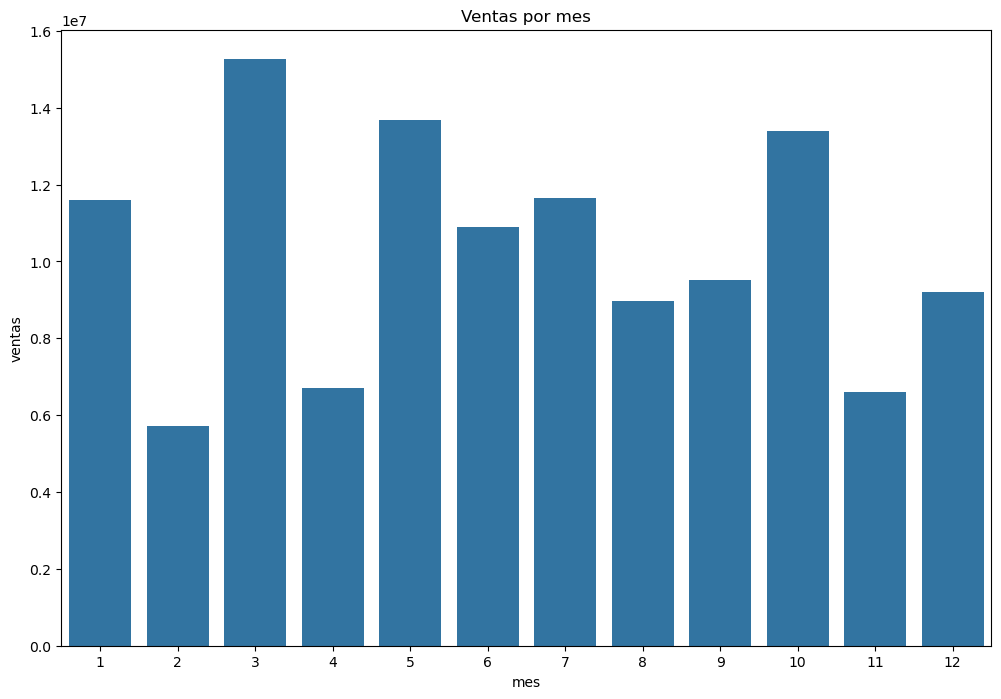

In [31]:
# Agrupa el DataFrame 'ventas' por la columna 'mes' -> ventas.groupby('mes')
# Sumando los valores de la columna ventas para cada grupo(mes) -> 'ventas'].sum()
# Restablece el índice del DataFrame resultante para convertir los índices de los grupos en columnas normales -> .reset_index()
# El resultado es un nuevo DataFrame 'ventas_por_mes' con dos columnas: mes y ventas.
ventas_por_mes = ventas.groupby('mes')['ventas'].sum().reset_index()

# Llamada función barplot de seaborn para crear un gráfico de barras -> sns.barplot
# Variable representada en el eje x -> x='mes'
# Variable representada en el eje y -> y='ventas'
# DataFrame ventas_por_mes como fuente de datos para el gráfico -> data=ventas_por_mes
sns.barplot(x='mes', y='ventas', data=ventas_por_mes)
# Establecimiento de título para el gráfico
plt.title('Ventas por mes')
# Impresión del gráfico
plt.show()

In [58]:
ventas_por_mes

,mes,ventas
0,1,11596426.87
1,2,5727484.06
2,3,15264989.72
3,4,6698520.83
4,5,13684213.56
5,6,10898160.43
6,7,11654255.19
7,8,8977000.36
8,9,9520021.13
9,10,13388705.67


- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

- Los meses centrales Mayo, Junio y Julio mantienen un buen nivel de ventas

- Meses con Ventas Más Altas:
    - Marzo (3): $15,264,989.72
    - Mayo (5): $13,684,213.56
    - Octubre (10): $13,388,705.67
    - Estos meses tienen las ventas más altas del año. Marzo es particularmente notable con ventas significativamente superiores a otros meses.

- Meses con Ventas Más Bajas:
    - Febrero (2): $5,727,484.06
    - Abril (4): $6,698,520.83
    - Noviembre (11): $6,607,134.14
    - Estos meses presentan las ventas más bajas del año. Febrero es el mes con las ventas más bajas, seguido de abril y noviembre.

- Variabilidad de Ventas:
    - Las ventas mensuales varían significativamente a lo largo del año, con un rango desde aproximadamente $5.7 millones hasta $15.3 millones.

- Meses con Ventas Moderadas:
    - Enero (1): $11,596,426.87
    - Junio (6): $10,898,160.43
    - Julio (7): $11,654,255.19
    - Agosto (8): $8,977,000.36
    - Septiembre (9): $9,520,021.13
    - Diciembre (12): $9,199,874.16
    - Estos meses presentan ventas moderadas, situándose entre los valores más altos y más bajos.

### Gráfico de línea de las ventas por año

Se observa la curva que dibuja la evolución de las ventas agrupadas por año.

- Explique línea por línea el siguiente código:

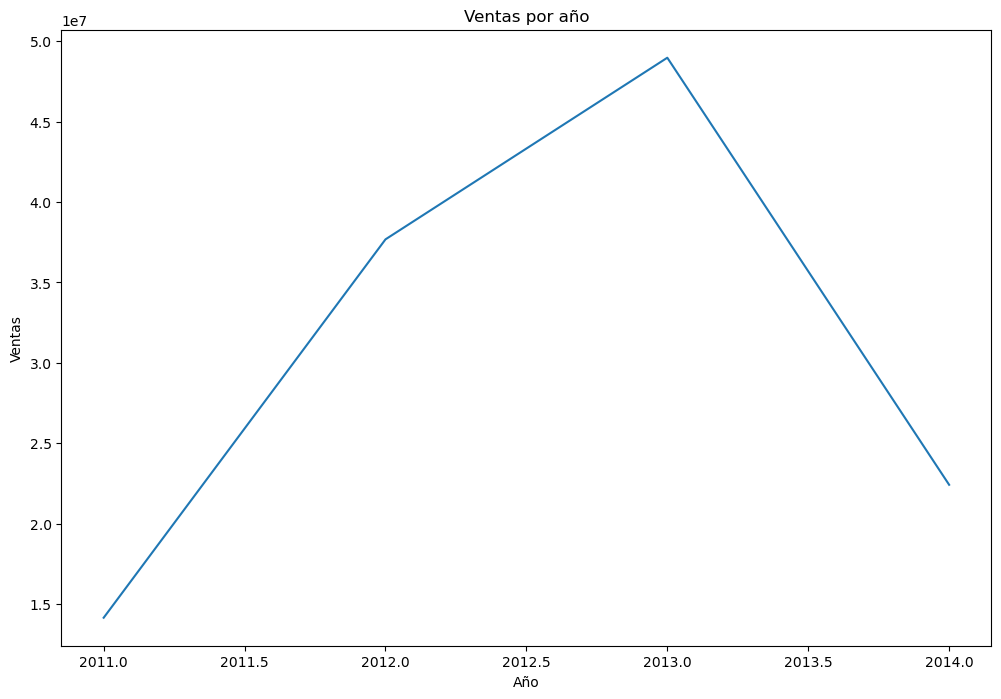

In [32]:
# Variable 'ventas_por_año = ': 
    # ventas.groupby('año'): objeto 'GroupBy' que agrupa los datos del DataFrame ventas por la columna 'año'.     
    # ['ventas'].sum(): ventas totales por año
    # reset_index(): restablecemos el índice en la 'Serie' convertida a 'DataFrame' de ventas totales por año.
ventas_por_año = ventas.groupby('año')['ventas'].sum().reset_index()

# Función plot de matplotlib para crear una gráfica de línea.
    # ventas_por_año['año']: columna 'año' del DataFrame ventas_por_año como eje x de la gráfica.
    # ventas_por_año['ventas']: columna 'ventas' del DataFrame ventas_por_año como eje y de la gráfica.
plt.plot(ventas_por_año['año'], ventas_por_año['ventas'])
# Establecemos el título de la gráfica
plt.title('Ventas por año')
# Establemos la etiqueta al eje X
plt.xlabel('Año')
# Establemos la etiqueta al eje Y
plt.ylabel('Ventas')
# Visualización de la gráfica por pantalla
plt.show()

- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

La gráfica ofrece 2 fases:
- __FASE 1__:
    - __Subfase 1.1__: 
        - __2011.0 -> 2012.0__: el __aumento__ de las ventas pasa de algo menos de __1.5M__ de unidades de moneda a más de __3.5M__ con un crecimiento exponencial
    - __Subfase 1.2__: 
        - __2012.0 -> 2013.0__: el __aumento__ de las ventas pasa de algo más de __3.5M__ de unidades de moneda a algo menos de __5.0M__ con un crecimiento notable, aunque algo menor que la subfase anterior
- __FASE 2__:
    - __2013.0 -> 2014.0__: __descenso__ de las ventas desde algo menos de __5.0M__ de unidades de moneda hasta caer por debajo de __2.5M__ con un decrecimiento exponencial

### Prueba formal: Prueba de tendencia

Existen diferentes métodos para realizar el análisis de tendencia, pero uno de los más utilizados es la `regresión lineal`. La regresión lineal es una técnica estadística que se utiliza para encontrar la relación entre una variable dependiente (por ejemplo, el precio de una acción) y una o más variables independientes (por ejemplo, el tiempo).

Se realiza una prueba de tendencia utilizando la función linregress de la biblioteca scipy.stats. Esta función calcula la `pendiente` de una línea de regresión lineal y el valor `p` asociado, que indica la probabilidad de que la pendiente sea cero. Si el valor `p` es menor que `0,05`, se concluye que hay evidencia de una tendencia significativa en los datos.

- Explicar el siguiente código:

In [33]:
# Importación de la función 'linregress' del módulo 'scipy.stats'
# Se utiliza para realizar una regresión lineal simple, 
# que calcula la línea de mejor ajuste para un conjunto de datos
from scipy.stats import linregress

# Llamada a la función linregress pasando dos series de datos: 
# los valores de la columna 'año' y los valores de la columna 'ventas' del DataFrame ventas:
#   - ventas['año']: valores de la variable independiente (eje x)
#   - ventas['ventas']: valores de la variable dependiente (eje y)

# slope, intercept, r_value, p_value, std_err: La función linregress devuelve cinco valores:
#   - slope: Pendiente de la línea de regresión, que indica el cambio en la variable dependiente (ventas) 
#            por cada unidad de cambio en la variable independiente (año).
#   - intercept: Intersección de la línea de regresión con el eje y, que es el valor de las ventas cuando el año es cero.
#   - r_value: Coeficiente de correlación, que mide la fuerza y la dirección de la relación lineal entre las dos variables.
#   - p_value: Valor p, que indica la probabilidad de obtener un coeficiente de regresión al menos tan extremo 
#              como el observado si la hipótesis nula es cierta (es decir, si no hay relación lineal).
#   - std_err: Error estándar de la pendiente, que mide la precisión de la estimación de la pendiente.
slope, intercept, r_value, p_value, std_err = linregress(ventas['año'], ventas['ventas'])

# Variables
#   - 'Pendiente' de la línea de regresión
#   - 'Probabilidad' de que no haya relación líneal
print('Pendiente: ', slope)
print('Valor p: ', p_value)
# Mensaje informativo
if p_value < 0.05:
    print('La tendencia es significativa')
else:
    print('No hay evidencia de tendencia significativa')

Pendiente:  745198.0612926556
Valor p:  0.008957361661882999
La tendencia es significativa


## Conclusiones

Luego del análisis realizado se puede concluir que la *pendiente* de **745198.0612926556** indica que hay un aumento en las ventas por año en la base de datos AdventureWorks2019. Es decir, en promedio, las ventas están aumentando en **745198.06 unidades por año**.

El *valor p* de **0.008957361661882999** indica que la probabilidad de obtener una pendiente tan grande como la observada en los datos si la pendiente real es cero es de aproximadamente **0.9%**. Como este valor p es menor que el nivel de significancia comúnmente utilizado de *0.05*, se concluye que hay evidencia suficiente para afirmar que hay una tendencia significativa en los datos.

***Por lo tanto, se puede afirmar que las ventas de AdventureWorks2019 están aumentando significativamente con el tiempo.***

## Recomendaciones

Dado que las ventas están aumentando significativamente con el tiempo, una recomendación para la empresa podría ser continuar invirtiendo en áreas clave para mantener esta tendencia positiva. Por ejemplo, la empresa podría considerar:

* *Mejorar el marketing*: la empresa podría invertir en esfuerzos de marketing para aumentar la conciencia de marca y atraer a más clientes potenciales.

* *Expandir la oferta de productos*: si la empresa ve un aumento en las ventas en ciertas categorías de productos, podría considerar expandir su oferta en esas áreas para aprovechar esa tendencia.

* *Optimizar la cadena de suministro*: si la empresa ve una tendencia a largo plazo de aumento en las ventas, podría considerar optimizar su cadena de suministro para garantizar que pueda satisfacer la demanda futura y mantener su nivel de servicio al cliente.

* *Fomentar la fidelidad del cliente*: la empresa podría implementar programas de lealtad para fomentar la fidelidad del cliente y aumentar la retención.

* *Explorar nuevos canales de venta*: la empresa podría considerar expandir su presencia en línea o abrir nuevas tiendas para aprovechar la tendencia positiva en las ventas.

En general, la recomendación sería que la empresa mantenga un enfoque en la comprensión y la satisfacción de las necesidades de sus clientes, así como en la eficiencia operativa, a medida que busca capitalizar en la tendencia positiva en las ventas.

- Efectuar nuevas consultas sql (desde **Azure Data Studio** o desde **SQL Server Managment Studio**).  Suponga que aún no le han informado del objetivo negocio, por lo tanto debe en primer lugar entender los datos que tiene. Explorar los datos que tienes en la misma base de datos **AdventureWorks2019** y ver que información relevante y de utilidad se puede extraer de allí. Guardar la(s) query(s) final(es) y luego pasarlo a `SQLALchemy` para obtener un dataframe final sobre el cual vas a realizar análisis descriptivos (con pandas) como los efectuados en el caso expuesto arriba. Los plots son opcionales. Elaborar conclusiones y recomendaciones sobre el potencial de tus resultados.   

1. Total de Ventas

In [36]:
import pandas as pd
from sqlalchemy import create_engine

# Configurar la conexión a la base de datos
engine = create_engine('mssql+pyodbc://DESKTOP-QRE2MBQ/AdventureWorks2019?driver=ODBC+Driver+17+for+SQL+Server')

# Consultas SQL
query = """
        SELECT YEAR(OrderDate) AS Año, SUM(TotalDue) AS TotalVentas
        FROM Sales.SalesOrderHeader
        GROUP BY YEAR(OrderDate)
        ORDER BY Año;
    """

# Ejecutar consultas y almacenar resultados en DataFrames
ventas_x_anio = pd.read_sql(query, engine)

# Mostrar resultados
ventas_x_anio


,Año,TotalVentas
0,2011,14155699.53
1,2012,37675700.31
2,2013,48965887.96
3,2014,22419498.32


In [37]:
# Aplicar estadísticas descriptivas
print(f"\nEstadísticas descriptivas:\n", ventas_x_anio.describe())


Estadísticas descriptivas:
           Año  TotalVentas
count    4.00         4.00
mean  2012.50  30804196.53
std      1.29  15540701.58
min   2011.00  14155699.53
25%   2011.75  20353548.62
50%   2012.50  30047599.31
75%   2013.25  40498247.22
max   2014.00  48965887.96


GRÁFICO DE BARRAS

Total Ventas Por Año

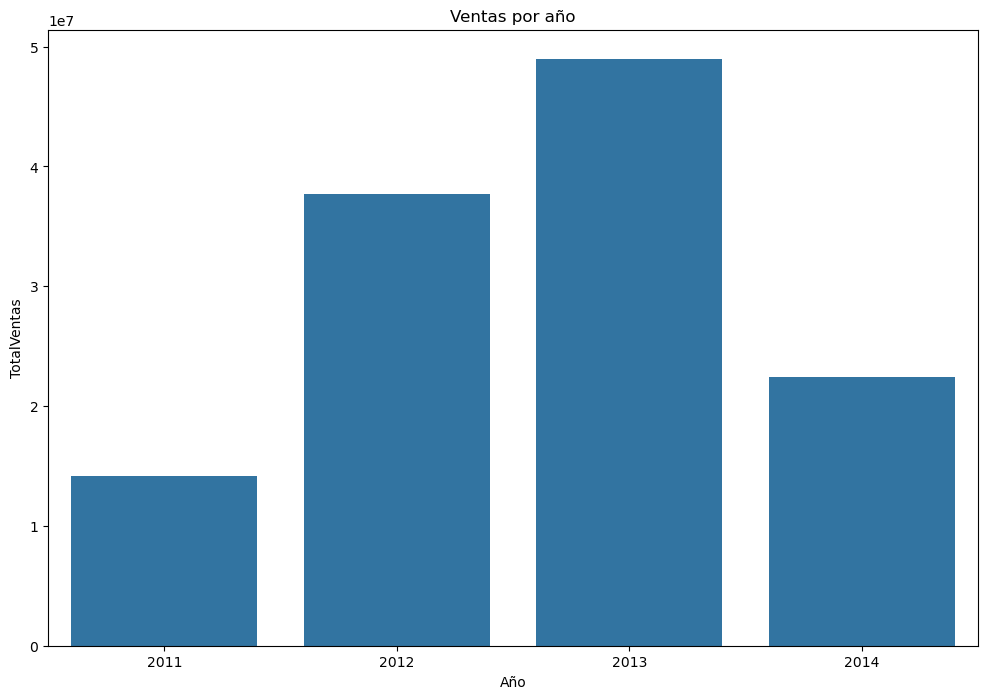

In [52]:
# Llamada a la función barplot de seaborn para crear un gráfico de barras -> sns.barplot
# Variable representada en el eje x -> x='Año'
# Variable representada en el eje y -> y='TotalVentas'
# DataFrame ventas_por_mes como fuente de datos para el gráfico -> data=ventas_x_anio
sns.barplot(x='Año', y='TotalVentas', data=ventas_x_anio)
# Establecimiento de título para el gráfico
plt.title('Ventas por año')
# Impresión del gráfico
plt.show()

GRÁFICO DE LÍNEA

Total Ventas Por Año

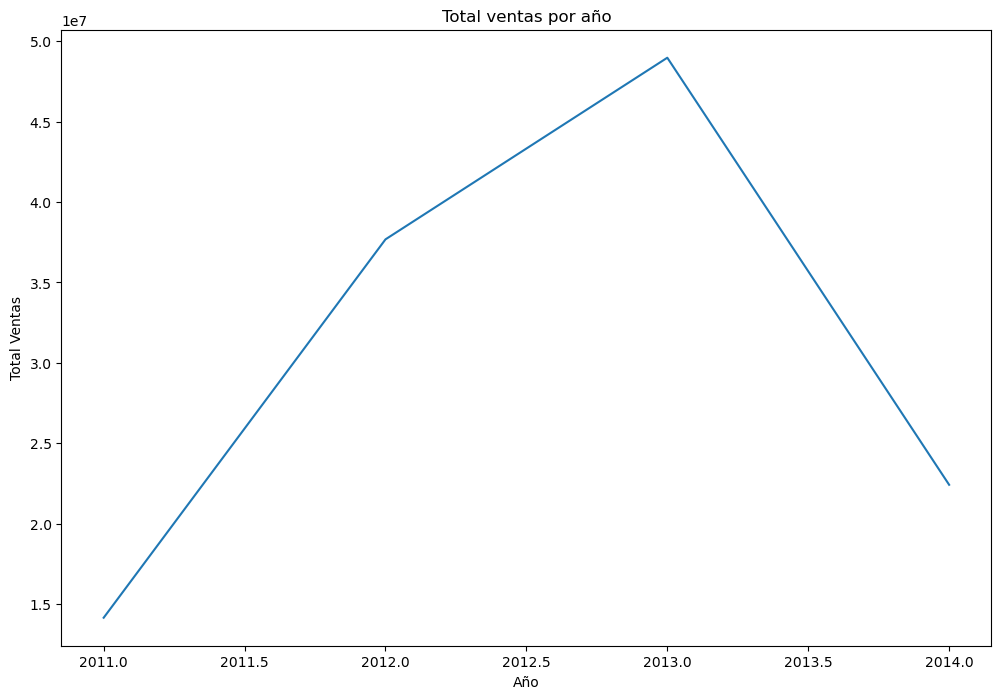

In [53]:
# Función plot de matplotlib para crear una gráfica de línea:
    # ventas_x_anio['Año']: columna 'Año' del DataFrame ventas_x_anio como eje x de la gráfica
    # ventas_por_año['ventas']: columna 'TotalVentas' del DataFrame ventas_x_anio como el eje y de la gráfica
plt.plot(ventas_x_anio['Año'], ventas_x_anio['TotalVentas'])
# Establecemos el título de la gráfica
plt.title('Total ventas por año')
# Establemos la etiqueta al eje X
plt.xlabel('Año')
# Establemos la etiqueta al eje Y
plt.ylabel('Total Ventas')
# Visualización de la gráfica por pantalla
plt.show()

__A. CONCLUSIONES__

- __A.1. Tendencia de Ventas__:
    - Las ventas han mostrado un crecimiento significativo de 2011 a 2013, con un aumento especialmente notable de 2011 a 2012 y luego a 2013.
    - En 2014, las ventas han disminuido considerablemente en comparación con 2013.

- __A.2. Crecimiento Anual__:
    - 2011: €14,155,699.53
    - 2012: €37,675,700.31 (incremento de €23,519,000.78 respecto a 2011)
    - 2013: €48,965,887.96 (incremento de €11,290,187.65 respecto a 2012)
    - 2014: €22,419,498.32 (disminución de €26,546,389.64 respecto a 2013)

__B. RECOMENDACIONES DE MEJORA__

- __B.1. Análisis de la Disminución en 2014__:
    - Investigación Interna: Revisar los factores internos que pueden haber contribuido a la disminución de las ventas en 2014, como cambios en la estrategia de ventas, reducción de personal clave, problemas de producción, etc.
    - Análisis Externo: Examinar factores externos, como cambios en el mercado, competencia, tendencias económicas o cambios en la demanda de los clientes.

- __B.2. Optimización de la Estrategia de Ventas__:
    - Revisar Estrategias Previas: Analizar las estrategias que llevaron al crecimiento en 2012 y 2013, e intentar replicarlas o adaptarlas para el futuro.
    - Diversificación de Productos/Servicios: Evaluar si la diversificación de la línea de productos o servicios podría atraer a más clientes y aumentar las ventas.
    - Expansión de Mercado: Considerar la expansión a nuevos mercados geográficos o segmentos de clientes para aumentar la base de clientes.

- __B.3. Mejora del Servicio al Cliente__:
    - Feedback de Clientes: Recoger y analizar el feedback de los clientes para identificar áreas de mejora en productos y servicios.
    - Programas de Lealtad: Implementar programas de lealtad para retener a los clientes existentes y fomentar las compras repetidas.

- __B.4. Marketing y Promociones__:
    - Campañas de Marketing: Desarrollar campañas de marketing dirigidas que aprovechen los canales más efectivos para llegar a los clientes.
    - Promociones Estacionales: Aprovechar las temporadas de alta demanda con promociones y descuentos para aumentar las ventas durante esos períodos.

- __B.5. Monitoreo Continuo y Adaptación__:
    - KPIs y Métricas: Establecer indicadores clave de rendimiento (KPIs) y monitorear regularmente las métricas de ventas para identificar rápidamente las tendencias y responder a ellas.
    - Análisis de Competencia: Mantener un análisis continuo de la competencia para ajustar las estrategias según las tendencias del mercado y las acciones de los competidores.

- __B.6. Innovación y Tecnología__:
    - Adopción de Tecnología: Implementar nuevas tecnologías para mejorar la eficiencia operativa y la experiencia del cliente.
    - Innovación en Productos: Invertir en investigación y desarrollo para innovar y ofrecer productos y servicios que satisfagan las necesidades cambiantes de los clientes.

2. Total de Ventas por Vendedor

In [38]:
import pandas as pd
from sqlalchemy import create_engine

# Configurar la conexión a la base de datos
engine = create_engine('mssql+pyodbc://DESKTOP-QRE2MBQ/AdventureWorks2019?driver=ODBC+Driver+17+for+SQL+Server')

# Consultas SQL
# TotalVentasPorVendedor
query = """
        SELECT SalesPersonID, SUM(TotalDue) AS TotalVentas
        FROM Sales.SalesOrderHeader
        GROUP BY SalesPersonID
        ORDER BY TotalVentas DESC;
    """

# Ejecutar consulta y almacenar resultado en DataFrame
ventas_x_vendedor = pd.read_sql(query, engine)

# Mostrar resultados
ventas_x_vendedor

,SalesPersonID,TotalVentas
0,NaN,32441339.12
1,276.00,11695019.06
2,277.00,11342385.90
3,275.00,10475367.08
4,289.00,9585124.95
5,279.00,8086073.68
6,281.00,7259567.88
7,282.00,6683536.66
8,290.00,5087977.21
9,283.00,4207894.60


In [39]:
# Aplicar estadísticas descriptivas
print(f"\nEstadísticas descriptivas:\n", ventas_x_vendedor.describe())


Estadísticas descriptivas:
        SalesPersonID  TotalVentas
count          17.00        18.00
mean          282.00   6845377.01
std             5.05   7391769.61
min           274.00    195528.78
25%           278.00   2198823.95
50%           282.00   4647935.91
75%           286.00   9210362.13
max           290.00  32441339.12


3. Tiempo Promedio de Envío

In [42]:
import pandas as pd
from sqlalchemy import create_engine

# Configurar la conexión a la base de datos
engine = create_engine('mssql+pyodbc://DESKTOP-QRE2MBQ/AdventureWorks2019?driver=ODBC+Driver+17+for+SQL+Server')

# Consultas SQL
# TiempoPromedioEnvio
query = """
        SELECT AVG(DATEDIFF(day, OrderDate, ShipDate)) AS TiempoPromedioEnvio
        FROM Sales.SalesOrderHeader
        WHERE ShipDate IS NOT NULL;
    """

# Ejecutar consulta y almacenar resultado en DataFrame
tiempo_promedio_envio = pd.read_sql(query, engine)

# Mostrar resultados
tiempo_promedio_envio

,TiempoPromedioEnvio
0,7


In [43]:
# Aplicar estadísticas descriptivas
print(f"\nEstadísticas descriptivas:\n", tiempo_promedio_envio.describe())


Estadísticas descriptivas:
        TiempoPromedioEnvio
count                 1.00
mean                  7.00
std                    NaN
min                   7.00
25%                   7.00
50%                   7.00
75%                   7.00
max                   7.00


4. Ventas por Método de Envío

In [45]:
import pandas as pd
from sqlalchemy import create_engine

# Configurar la conexión a la base de datos
engine = create_engine('mssql+pyodbc://DESKTOP-QRE2MBQ/AdventureWorks2019?driver=ODBC+Driver+17+for+SQL+Server')

# Consultas SQL
# VentasPorMetodoEnvio   
query =  """
        SELECT ShipMethodID, SUM(TotalDue) AS TotalVentas
        FROM Sales.SalesOrderHeader
        GROUP BY ShipMethodID
        ORDER BY TotalVentas DESC;
    """

# Ejecutar consulta y almacenar resultado en DataFrame
ventas_x_metodo_envio = pd.read_sql(query, engine)

# Mostrar resultados
ventas_x_metodo_envio

,ShipMethodID,TotalVentas
0,5,90775446.99
1,1,32441339.12


In [47]:
# Aplicar estadísticas descriptivas
print(f"\nEstadísticas descriptivas:\n", ventas_x_metodo_envio.describe())


Estadísticas descriptivas:
        ShipMethodID  TotalVentas
count          2.00         2.00
mean           3.00  61608393.06
std            2.83  41248443.25
min            1.00  32441339.12
25%            2.00  47024866.09
50%            3.00  61608393.06
75%            4.00  76191920.03
max            5.00  90775446.99


5. Subtotal de Impuestos y Flete por Año

In [49]:
import pandas as pd
from sqlalchemy import create_engine

# Configurar la conexión a la base de datos
engine = create_engine('mssql+pyodbc://DESKTOP-QRE2MBQ/AdventureWorks2019?driver=ODBC+Driver+17+for+SQL+Server')

# Consultas SQL
# SubtotalImpuestosFletePorAño    
query = """
        SELECT YEAR(OrderDate) AS Año, SUM(SubTotal) AS Subtotal, SUM(TaxAmt) AS Impuestos, SUM(Freight) AS Flete
        FROM Sales.SalesOrderHeader
        GROUP BY YEAR(OrderDate)
        ORDER BY Año;
    """

# Ejecutar consulta y almacenar resultado en DataFrame
sub_imp_flete_x_anio = pd.read_sql(query, engine)

# Mostrar resultados
sub_imp_flete_x_anio

,Año,Subtotal,Impuestos,Flete
0,2011,12641672.21,1153544.57,360482.74
1,2012,33524301.33,3162970.58,988428.40
2,2013,43622479.05,4071168.46,1272240.45
3,2014,20057928.81,1799290.84,562278.66


In [57]:
# Aplicar estadísticas descriptivas
print(f"\nEstadísticas descriptivas:\n", sub_imp_flete_x_anio.describe())


Estadísticas descriptivas:
           Año    Subtotal  Impuestos      Flete
count    4.00        4.00       4.00       4.00
mean  2012.50 27461595.35 2546743.62  795857.56
std      1.29 13812735.26 1316978.36  411555.80
min   2011.00 12641672.21 1153544.57  360482.74
25%   2011.75 18203864.66 1637854.28  511829.68
50%   2012.50 26791115.07 2481130.71  775353.53
75%   2013.25 36048845.76 3390020.05 1059381.42
max   2014.00 43622479.05 4071168.46 1272240.45


GRÁFICO DE BARRAS

Subtotal Impuestos Flete Por Año

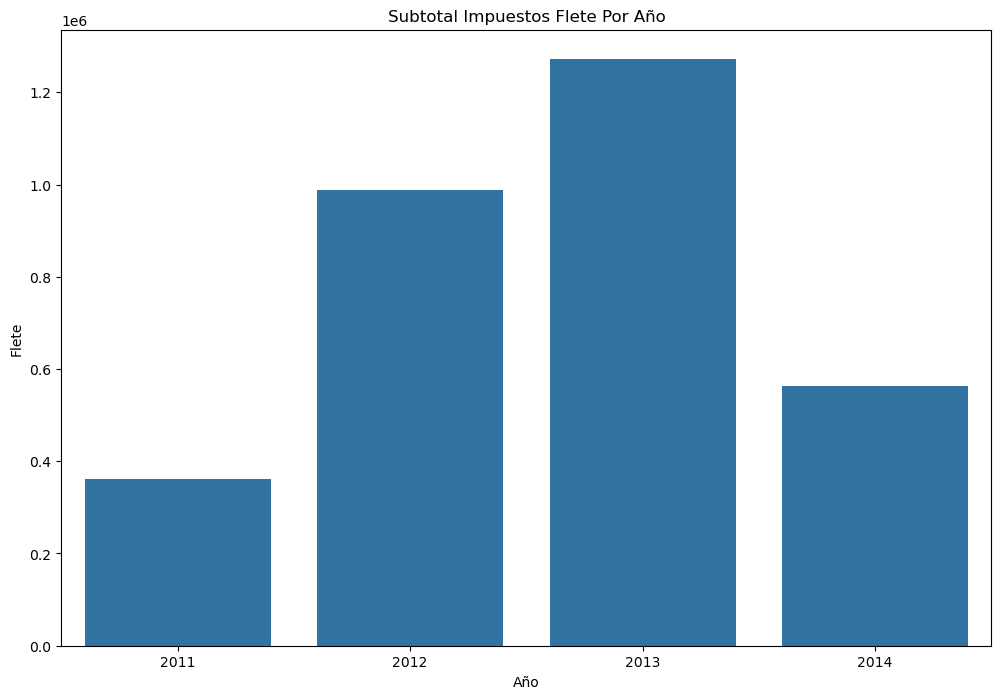

In [55]:
flete_x_anio = sub_imp_flete_x_anio.groupby('Año')['Flete'].sum().reset_index()

sns.barplot(x='Año', y='Flete', data=flete_x_anio)
# Establecimiento de título para el gráfico
plt.title('Subtotal Impuestos Flete Por Año')
# Impresión del gráfico
plt.show()

GRÁFICO DE LÍNEA

Subtotal Impuestos Flete Por Año

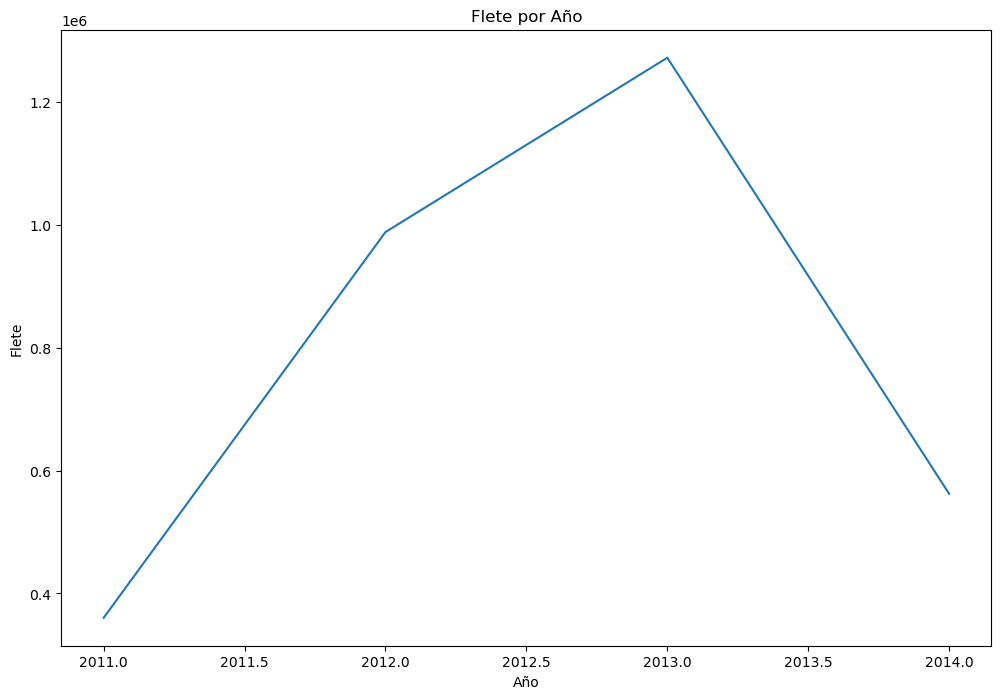

In [56]:
flete_x_anio = sub_imp_flete_x_anio.groupby('Año')['Flete'].sum().reset_index()

plt.plot(flete_x_anio['Año'], flete_x_anio['Flete'])
# Establecemos el título de la gráfica
plt.title('Flete por Año')
# Establemos la etiqueta al eje X
plt.xlabel('Año')
# Establemos la etiqueta al eje Y
plt.ylabel('Flete')
# Visualización de la gráfica por pantalla
plt.show()

__A. CONCLUSIONES__

- __A.1. Tendencia de Subtotal de Ventas__:
    - 2011: €12,641,672.21
    - 2012: €33,524,301.33
    - 2013: €43,622,479.05
    - 2014: €20,057,928.81
    - Hay un crecimiento significativo en el subtotal de ventas de 2011 a 2013. Sin embargo, en 2014, se observa una caída considerable en comparación con 2013.

- __A.2. Impuestos__:
    - 2011: €1,153,544.57
    - 2012: €3,162,970.58
    - 2013: €4,071,168.46
    - 2014: €1,799,290.84
    - Los impuestos también muestran una tendencia similar a la de las ventas, aumentando hasta 2013 y luego disminuyendo en 2014.

- __A.3. Flete__:
    - 2011: €360,482.74
    - 2012: €988,428.40
    - 2013: €1,272,240.45
    - 2014: €562,278.66
    - Los costos de flete siguen la misma tendencia de aumento hasta 2013 y disminución en 2014.

__B. RECOMENDACIONES DE MEJORA__

- __B.1. Optimización de Costos de Flete__:
    - Negociación con Proveedores: Negociar mejores tarifas con los proveedores de servicios de flete.
    - Optimización Logística: Implementar prácticas logísticas eficientes para reducir los costos de envío.
    - Tecnología de Gestión de Transporte: Usar software de gestión de transporte para optimizar rutas y reducir costos.

- __B.2. Estrategia de Impuestos__:
    - Incentivos Fiscales: Explorar incentivos fiscales y programas de exención de impuestos que puedan reducir la carga fiscal.
    - Cumplimiento y Planificación: Asegurar el cumplimiento y una planificación fiscal efectiva para minimizar la carga impositiva.